Author: Heisengarg   
Date: 9 Januray 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("voice.csv")
#Source: https://www.kaggle.com/primaryobjects/voicegender

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Comparing Random Forest and simple Decision Tree Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X=df.ix[:,df.columns!='label']
Y=df.label

clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X,Y)

clf_rft = RandomForestClassifier()
clf_rft = clf_rft.fit(X,Y)

clf_et=tree.ExtraTreeClassifier()
clf_et.fit(X,Y)

score_dt=[]
score_rft=[]
score_et=[]
start=3
end=10

for i in range(3,11):
    
    score_dt.append(cross_val_score(clf_dt, X, Y,cv=i).mean())
    score_rft.append(cross_val_score(clf_rft,X,Y,cv=i).mean())
    score_et.append(cross_val_score(clf_et,X,Y,cv=i).mean())



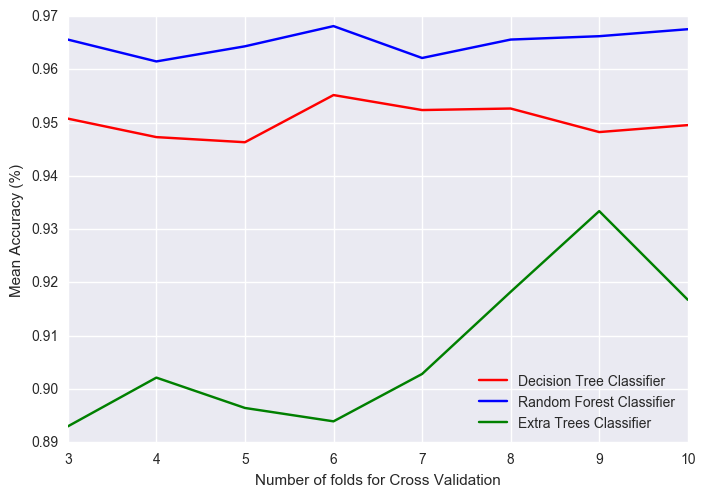

In [98]:
p1=plt.plot(range(start,end+1),score_dt,'r',label='Decision Tree Classifier')
p2=plt.plot(range(start,end+1),score_rft,'b',label='Random Forest Classifier')
p3=plt.plot(range(start,end+1),score_et,'g',label='Extra Trees Classifier')
plt.legend(loc=4)
plt.ylabel('Mean Accuracy (%)')
plt.xlabel('Number of folds for Cross Validation')

### Visualizing a Tree (Stuck with bad font)

In [29]:
from sklearn import tree
tree.export_graphviz(clf_dt, out_file='tree.dot') #clf_dt has 10 folds


(process:4757): Pango-CRITICAL **: No modules found:
No builtin or dynamically loaded modules were found.
PangoFc will not work correctly.
This probably means there was an error in the creation of:
  '/sw/lib/pango-ft219/etc/pango/pango.modules'
You should create this file by running:
  pango-querymodules > '/sw/lib/pango-ft219/etc/pango/pango.modules'

(process:4757): Pango-WARNING **: failed to choose a font, expect ugly output. engine-type='PangoRenderFc', script='latin'



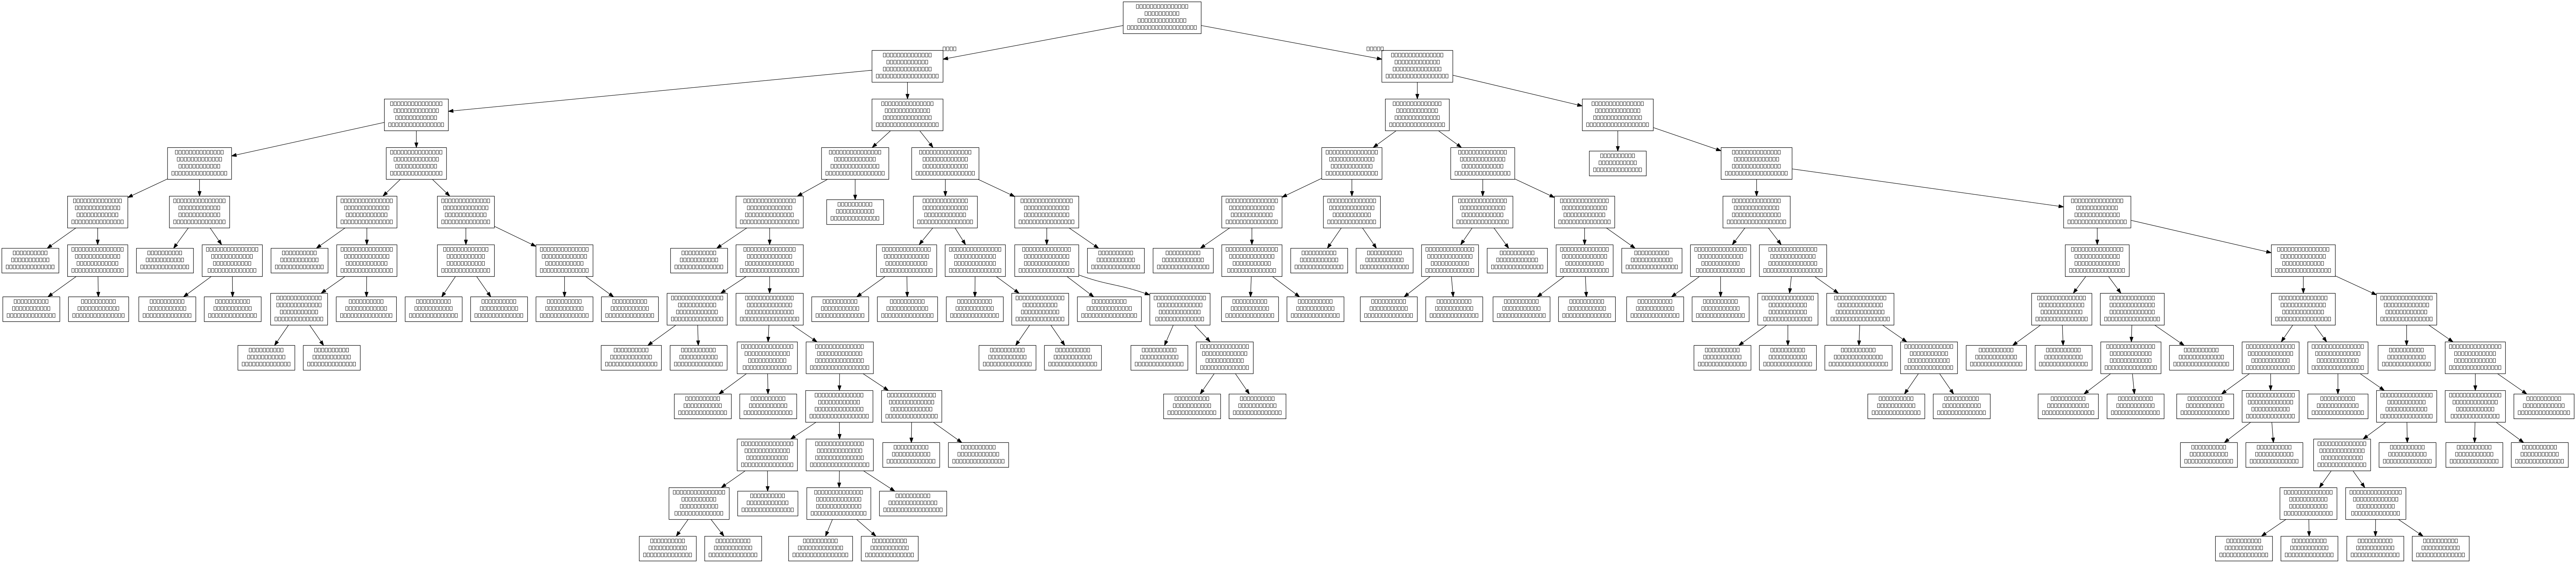

In [36]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

import gi
#gi.require_version('Gtk', '3.0')
#from gi.repository import Gtk, Pango
#import pango

dotfile = StringIO()
tree.export_graphviz(clf_dt, out_file=dotfile)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

### Feature Selection

/Users/Ayush/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


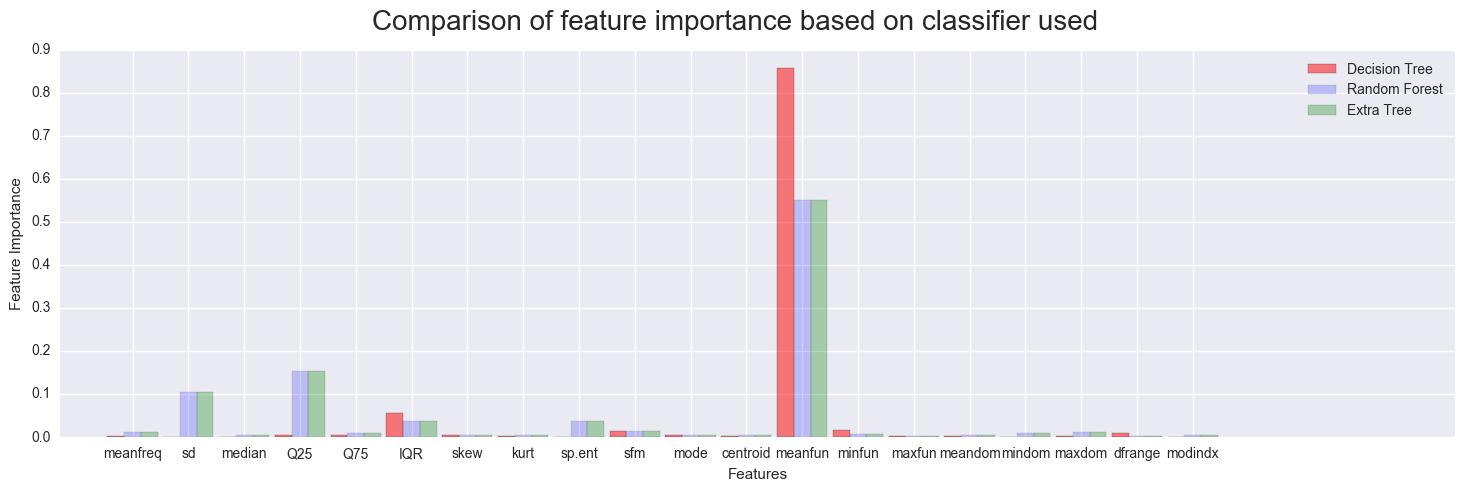

In [177]:
from sklearn.feature_selection import SelectFromModel

#clf=RandomForestClassifier()
#clf.fit(X,Y)

#Random Forest Classifier

fi_rft=clf_rft.feature_importances_
fi_dt=clf_dt.feature_importances_
fi_et=clf_et.feature_importances_

fig=plt.figure(figsize=(18,5))
ax=plt.subplot(111)

wi=0.3
w=0.3

ax.bar(np.arange(1,21),fi_dt,width=wi,align='center',color='r',alpha=0.5)
ax.bar(np.arange(1,21)+w,height=fi_rft,width=wi,align='center',color='b',alpha=0.2)
ax.bar(np.arange(1,21)+2*w,height=fi_rft,width=wi,align='center',color='g',alpha=0.3)

ax.legend(loc=4)

ax.set_xticks(np.arange(1,21)+wi) #set position of xlabels to match with on the plot
ax.set_xticklabels(np.delete(df.columns,20).values) #now rename those labels

ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')

ax.legend(('Decision Tree','Random Forest','Extra Tree'))
fig.suptitle('Comparison of feature importance based on classifier used',fontsize=20)
#ax.show()
